#### Limitation of Naive/Standard RAG
- Hallucination
- Lack of domain specificity
- Handling complex or multi-turn conversation

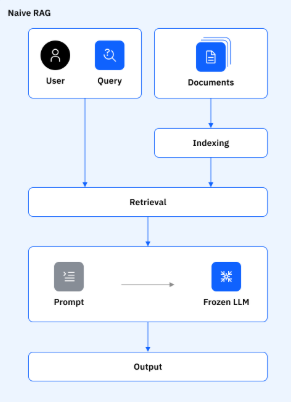

## Advance RAG
- Improve the quality of both retrieval and generation
- takes the basic RAG and enhances it with extra steps both before and after retrieval processes
- **Pre-Retrieval Processes involves:** before user ask question (1,2,3) and then **At-Retrieval Processes:** the moment user submits a query, find the most relevant chunks (4,5,6)
    1. **Data Cleaning and Preparation:** extract the text from files like pdf,word then remove noise and irrelevant content like html tags then normalize the content like correcting typo, expanding abbreviations, converting whole content in lower case and then removing duplicate to reduce redundant results
    2. **Sophisticated Chunking Strategies:** can use any good chunking strategy learned earlier
        - Contextual Chunking/Semantic Chunking
        - Small2Big Chunking(Parent Document Retrieval)
    3. **Metadata Extraction and Summaries:** add layer of metadata or summary context to the created each chunks before embeddings. This metadata can be used later to filter the search space and to help the retrieval system better understand the chunk's content
    4. **Knowledge Graph-Augmented Retrieval (KGAR):** create the knowledge graph by extracting entities and their relationships from the text (allow RAG system to answer highly specific, relational questions)
    5. **Query Re-writing/Reformulation**
        - Query Expansion 
        - Multi query
        - Hypothetical Document Embeddings (HyDE)
    6. Query Routing/Intent Classification
    7. Hybrid Search (Reciprocal Rank Fusion - RRF)
- **Post-Retrieval Processes involves:** after we have retrieved a list of documents but before we send them to LLM
    1. Re-ranking
    2. Prompt Compression/Condensing
    3. Redundancy Removal
    4. Self-Correction/Critique

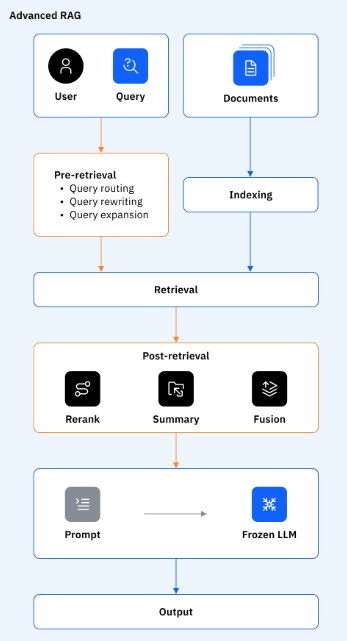

### Query Re-writing
Query Re-writing is a technique of expanding user query to retrieve more relevant documents. There are way we can perform it using LLM as:
- #### Query Expansion:
    - Writing user query in our own words by correcting typos, adding relevant words("climate change" expands to "climate change OR global warming"), adding synonyms("car" expands to "car OR automobile OR vehicle"), performing stemming/lemmatization
- #### Multi-Query: 
    - It involves generating n queries similar to user query by using LLM
    - Each of generated query along with original query is then vectorized and used to retrieve the relevant documents
    - then pass the retrieved documents as context to LLM for final result generation
    - 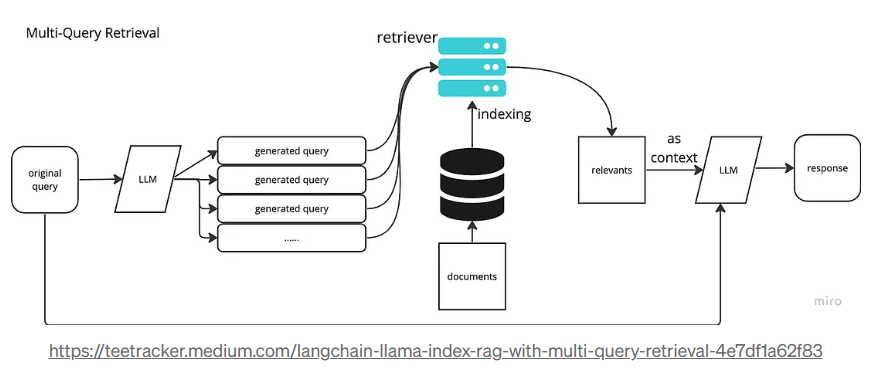
- #### Hypothetical Document Embeddings:
    - Asking LLM using first zero-shot prompts to generate a hypothetical answer/document for user query (can be done 5 times)
    - then create the embeddings of the each hypothetical answers along with user query to find out the context of relevant documents from retrieval
    - here we are doing answer to answer embedding similarity search instead of query to answer embedding (naive rag)
    - 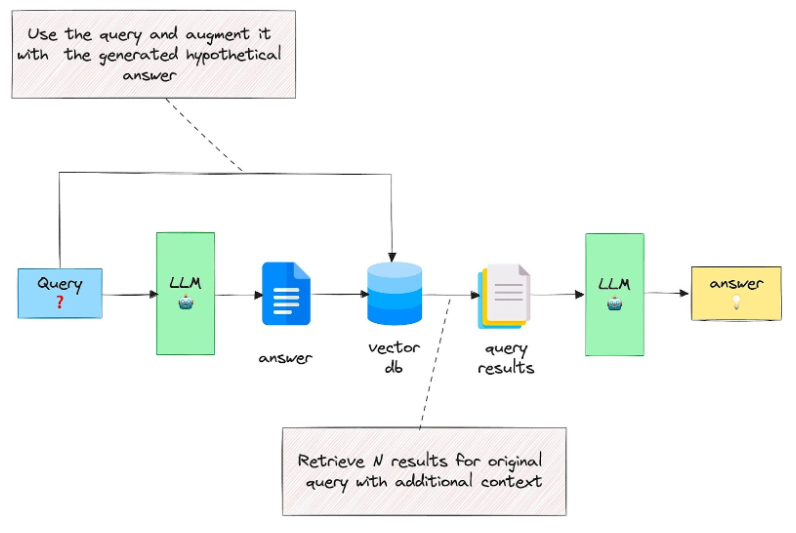

### Multi-hop Reasoning
- It is a critical capability in AI that enables system to answer complex questions or make decisions by connecting multiple piece of infomation across different sources.
- It mirrors how human often solve complex problems by breaking them down into smaller interconnected steps.
- Imagine "What is the captial of the country where the inventor of light bulb was born?" to answer this:
    - Identify the inventor of the light bulb (Thomas Edison).
    - Determine where Thomas Edison was born (United States).
    - Find the capital of the United States (Washington, D.C.).
- Each of these steps represents a "hop" in reasoning process. Each step relies on the output of the previous one and no single document provides the direct answer.
- The system has to perform a "chain of inferences" and "retrieve distributed information" which is the hallmark of multi-hop reasoning.

NOTE: **Chain-of-Thought (CoT) Prompting** is used to augment the LLM

### Sentence Window Retrieval Technique
https://www.linkedin.com/pulse/sentence-window-retrieval-optimizing-llm-performance-rutam-bhagat-v24of/

https://learn.deeplearning.ai/courses/building-evaluating-advanced-rag/lesson/k3gmx/sentence-window-retrieval

- Basic RAG, same chunks are used for entire pipeline.
- 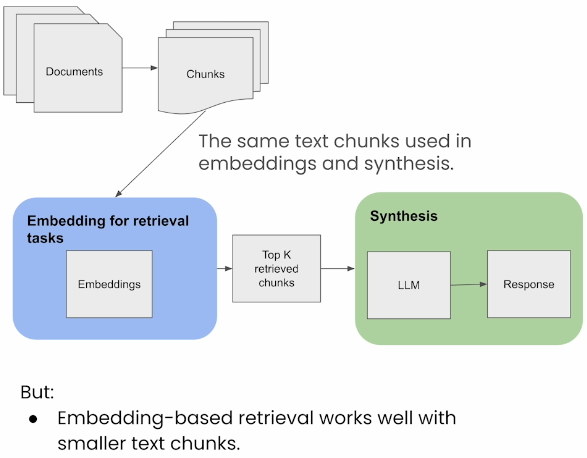
- But in sentence window retrieval, during indexing, documents are broken into smaller chunks or sentences and indexed. During retrieval, the sentences that are most relevant to a given query, based on a certain similarity metric, are retrieved.
- 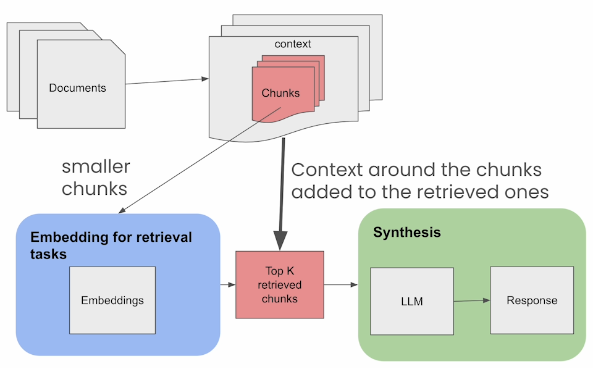
- Once we have the relevant sentences, we can retrieve neighboring sentences (using metadata from SentenceWindowNodeRetriever) to provide full context. The number of neighboring sentences to retrieve is defined by a fixed number of sentences before and after the relevant sentence.
- 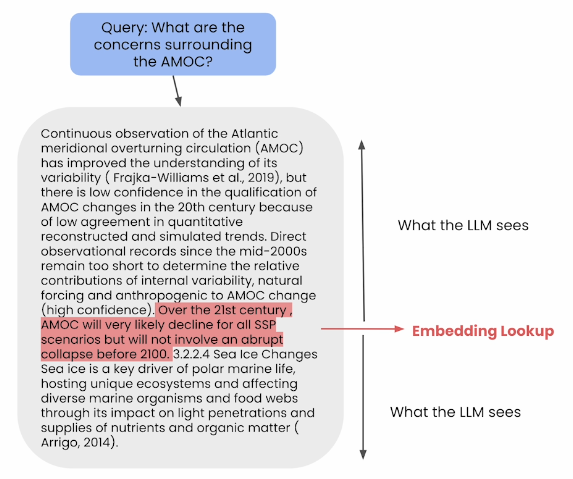
- It gives an LLM better context by retrieving not just the most relevant sentence, but the window of sentences that occur before and after relevant sentence in the document.